## Load Dataset

In [2]:
import pandas as pd
import numpy as np

#Baca dataset dengan menggunakan function read_csv dari pandas
df_diabetes=pd.read_csv('diabetes.csv')
df_diabetes.head (20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## Drop Fitur

In [ ]:
df_diabetes2=df_diabetes.drop(['Insulin', 'SkinThickness',  'DiabetesPedigreeFunction'], axis=1)
df_diabetes2.head(50)

,Pregnancies,Glucose,BloodPressure,BMI,Age,Outcome
0,6,148,72,33.6,50,1
1,1,85,66,26.6,31,0
2,8,183,64,23.3,32,1
3,1,89,66,28.1,21,0
4,0,137,40,43.1,33,1
5,5,116,74,25.6,30,0
6,3,78,50,31.0,26,1
7,10,115,0,35.3,29,0
8,2,197,70,30.5,53,1
9,8,125,96,0.0,54,1


In [4]:
print("data null \n",df_diabetes2.isnull().sum())
print("\ndata kosong \n", df_diabetes2.empty)
print("\ndata nan \n", df_diabetes2.isna().sum())


data null 
 Pregnancies      0
Glucose          0
BloodPressure    0
BMI              0
Age              0
Outcome          0
dtype: int64

data kosong 
 False

data nan 
 Pregnancies      0
Glucose          0
BloodPressure    0
BMI              0
Age              0
Outcome          0
dtype: int64


## Pengecekan Data Duplikat

In [5]:
#pengecekan data duplikat
print("Sebelum Pengecekan data duplikat, ", df_diabetes2.shape)
df_diabetes3=df_diabetes2.drop_duplicates (keep='last')
print("Setelah Pengecekan data duplikat, ", df_diabetes3.shape)

Sebelum Pengecekan data duplikat,  (768, 6)
Setelah Pengecekan data duplikat,  (768, 6)


## Train and Test Split


In [6]:
from sklearn.model_selection import train_test_split

x = df_diabetes3.drop(columns=['Outcome'],axis=1)
y = df_diabetes3['Outcome']

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=43)

print(x_train.shape)
print(x_test.shape)


(576, 5)
(192, 5)


## Pipeline

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
import numpy as np

# Rancang pipeline
pipe_svm = Pipeline(steps=[
    ('scale', MinMaxScaler()),
    ('feat_select', SelectKBest()),
    ('clf', SVC(class_weight='balanced'))
])

# Parameter grid
params_grid_svm = [
    {
        'scale': [MinMaxScaler()],
        'feat_select': [SelectKBest()],
        'feat_select__k': np.arange(2, 6),
        'clf__kernel': ['poly', 'rbf'],
        'clf__C': [0.1, 1],
        'clf__gamma': [0.1, 1]
    },
    {
        'scale': [MinMaxScaler()],
        'feat_select': [SelectPercentile()],
        'feat_select__percentile': np.arange(20, 50, 10),
        'clf__kernel': ['poly', 'rbf'],
        'clf__C': [0.1, 1],
        'clf__gamma': [0.1, 1]
    },
    {
        'scale': [StandardScaler()],
        'feat_select': [SelectKBest()],
        'feat_select__k': np.arange(2, 6),
        'clf__kernel': ['poly', 'rbf'],
        'clf__C': [0.1, 1],
        'clf__gamma': [0.1, 1]
    },
    {
        'scale': [StandardScaler()],
        'feat_select': [SelectPercentile()],
        'feat_select__percentile': np.arange(20, 50, 10),
        'clf__kernel': ['poly', 'rbf'],
        'clf__C': [0.1, 1],
        'clf__gamma': [0.1, 1]
    }
]

# Stratified KFold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=43)

# GridSearchCV
GSCV_SVM = GridSearchCV(pipe_svm, params_grid_svm, cv=cv)

# Jalankan pelatihan
GSCV_SVM.fit(x_train, y_train)
print("GSCV training finished")

# Evaluasi
from sklearn.metrics import classification_report

y_pred = GSCV_SVM.predict(x_test)
print(classification_report(y_test, y_pred))


GSCV training finished
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       124
           1       0.75      0.56      0.64        68

    accuracy                           0.78       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



CV Score : 0.7691
Test Score: 0.7760
Best model: Pipeline(steps=[('scale', MinMaxScaler()), ('feat_select', SelectKBest(k=2)),
                ('clf',
                 SVC(C=0.1, class_weight='balanced', gamma=1, kernel='poly'))])
Best features: ['Glucose', 'BMI']


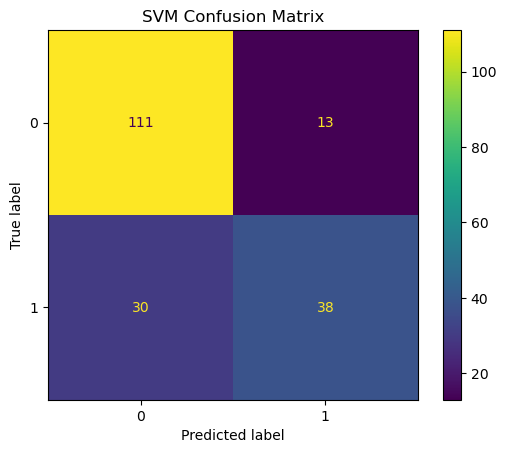

Classification Report SVM:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       124
           1       0.75      0.56      0.64        68

    accuracy                           0.78       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



In [8]:
# Tampilkan skor cross-validation terbaik
print("CV Score : {:.4f}".format(GSCV_SVM.best_score_))

# Tampilkan skor model terbaik GSCV pada test set
print("Test Score: {:.4f}".format(GSCV_SVM.best_estimator_.score(x_test, y_test)))

# Tampilkan best model
print("Best model:", GSCV_SVM.best_estimator_)

# Tampilkan fitur terbaik yang dipilih oleh feature selection
mask = GSCV_SVM.best_estimator_.named_steps['feat_select'].get_support()

# Pastikan x_train adalah DataFrame, ambil kolomnya untuk masking
print("Best features:", x_train.columns[mask].tolist())

# Prediksi data test
SVM_pred = GSCV_SVM.predict(x_test)

# Buat confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, SVM_pred, labels=GSCV_SVM.classes_)

# Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_SVM.classes_)
disp.plot()
plt.title("SVM Confusion Matrix")
plt.show()

# Classification report
print("Classification Report SVM:\n", classification_report(y_test, SVM_pred))


In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np

# Rancang pipeline: scaling → feature selection → classifier
pipe_RF = Pipeline(steps=[
    ('data_scaling', StandardScaler()),
    ('feature_select', SelectKBest()),
    ('clf', RandomForestClassifier(random_state=43, class_weight='balanced'))  # Ganti dengan 2 digit NPM kamu jika ingin personalisasi
])

# Parameter grid (harus sesuai nama langkah di pipeline dengan format 'step__parameter')
params_grid_RF = [
    {
        'data_scaling': [StandardScaler()],
        'feature_select': [SelectKBest()],
        'feature_select__k': np.arange(2, 6),
        'clf__max_depth': np.arange(4, 6),
        'clf__n_estimators': [100, 150]
    },
    {
        'data_scaling': [StandardScaler()],
        'feature_select': [SelectPercentile()],
        'feature_select__percentile': np.arange(20, 50, 10),
        'clf__max_depth': np.arange(4, 6),
        'clf__n_estimators': [100, 150]
    },
    {
        'data_scaling': [MinMaxScaler()],
        'feature_select': [SelectKBest()],
        'feature_select__k': np.arange(2, 6),
        'clf__max_depth': np.arange(4, 6),
        'clf__n_estimators': [100, 150]
    },
    {
        'data_scaling': [MinMaxScaler()],
        'feature_select': [SelectPercentile()],
        'feature_select__percentile': np.arange(20, 50, 10),
        'clf__max_depth': np.arange(4, 6),
        'clf__n_estimators': [100, 150]
    }
]

# StratifiedKFold CV
SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=43)

# GridSearchCV
GSCV_RF = GridSearchCV(pipe_RF, params_grid_RF, cv=SKF)

# Fit model (ganti x_train_enc dengan x_train kalau belum pakai encoder)
GSCV_RF.fit(x_train, y_train)

print("GSCV training finished")


GSCV training finished


CV Score: 0.7395
Test Score: 0.8125
Best model: Pipeline(steps=[('data_scaling', MinMaxScaler()),
                ('feature_select', SelectKBest(k=5)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=4,
                                        random_state=43))])
Best features: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age'], dtype='object')


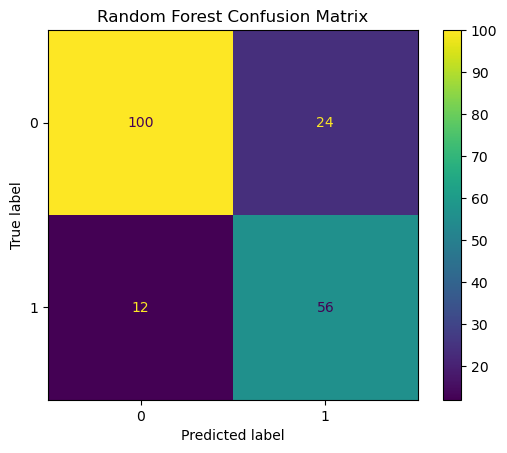

Classification report RF:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85       124
           1       0.70      0.82      0.76        68

    accuracy                           0.81       192
   macro avg       0.80      0.81      0.80       192
weighted avg       0.82      0.81      0.82       192



In [10]:
# Tampilkan skor cross-validation
print("CV Score: {:.4f}".format(GSCV_RF.best_score_))

# Tampilkan skor model terbaik GSCV pada test set
print("Test Score: {:.4f}".format(GSCV_RF.best_estimator_.score(x_test, y_test)))

# Tampilkan best model
print("Best model:", GSCV_RF.best_estimator_)

# Ambil fitur terbaik yang dipilih oleh feature selection
mask = GSCV_RF.best_estimator_.named_steps['feature_select'].get_support()
print("Best features:", x_train.columns[mask])

# Prediksi pada test set
RF_pred = GSCV_RF.predict(x_test)

# Import visualisasi
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Buat confusion matrix
cm = confusion_matrix(y_test, RF_pred, labels=GSCV_RF.classes_)

# Buat confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_RF.classes_)
disp.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

# Tampilkan classification report
print("Classification report RF:\n", classification_report(y_test, RF_pred))


In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np

# Pipeline: feature selection → Gradient Boosting
pipe_GBT = Pipeline(steps=[
    ('feat_select', SelectKBest()),
    ('clf', GradientBoostingClassifier(random_state=43))  # ganti 43 dengan 2 digit NPM kamu jika perlu
])

# Parameter grid
params_grid_GBT = [
    {
        'feat_select': [SelectKBest()],
        'feat_select__k': np.arange(2, 6),
        'clf__max_depth': [4],
        'clf__n_estimators': [100, 150],
        'clf__learning_rate': [0.01, 0.1, 1]
    },
    {
        'feat_select': [SelectPercentile()],
        'feat_select__percentile': np.arange(20, 50, 10),
        'clf__max_depth': [4],
        'clf__n_estimators': [100, 150],
        'clf__learning_rate': [0.01, 0.1, 1]
    }
]

# GridSearchCV dengan StratifiedKFold
GSCV_GBT = GridSearchCV(pipe_GBT, params_grid_GBT, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=43))

# Fit model (gunakan x_train_enc jika memang data sudah di-encode)
GSCV_GBT.fit(x_train, y_train)

print("GSCV Finished")


GSCV Finished


CV Score: 0.7499700149925037
Test Score: 0.7916666666666666
Best model: Pipeline(steps=[('feat_select', SelectKBest(k=5)),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=4,
                                            n_estimators=150,
                                            random_state=43))])
Best features: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age'], dtype='object')


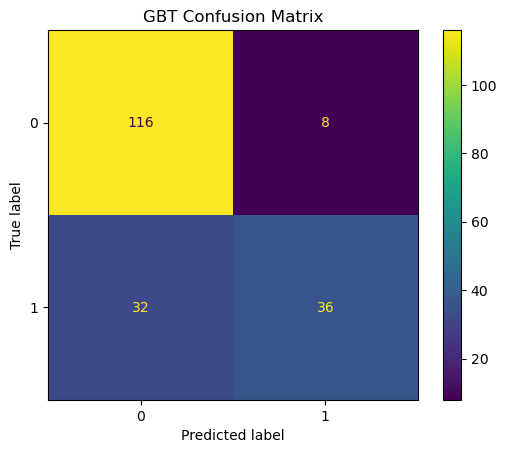

Classification report GBT: 
               precision    recall  f1-score   support

           0       0.78      0.94      0.85       124
           1       0.82      0.53      0.64        68

    accuracy                           0.79       192
   macro avg       0.80      0.73      0.75       192
weighted avg       0.80      0.79      0.78       192



In [12]:
#tampilkan skor cross-validation
print("CV Score: {}".format(GSCV_GBT.best_score_))
#tampilkan skor model terbaik GSCV pada test set
print("Test Score: {}".format(GSCV_GBT.best_estimator_.score(x_test, y_test)))
#tampilkan best model dan best features
print("Best model:", GSCV_GBT.best_estimator_)
mask = GSCV_GBT.best_estimator_.named_steps['feat_select'].get_support()
print("Best features:", x_train.columns[mask])
#buat prediksi dari test set
RF_pred = GSCV_GBT.predict(x_test)
import matplotlib.pyplot as plt
#buat confusion matrix
cm = confusion_matrix(y_test, RF_pred, labels=GSCV_GBT.classes_)
#buat confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_GBT.classes_)
disp.plot()
plt.title("GBT Confusion Matrix")
plt.show()
#tampilkan Classification report
print("Classification report GBT: \n", classification_report(y_test, RF_pred))

In [13]:
sample_data = pd.DataFrame([{
    'Pregnancies': 3,
    'Glucose': 158,
    'BloodPressure': 76,
    'BMI': 31.6,
    'Age': 28
}])



In [14]:
predicted_class = GSCV_RF.predict(sample_data)
predicted_proba = GSCV_RF.predict_proba(sample_data)

print("Prediksi kelas:", predicted_class[0])
print("Probabilitas prediksi [kelas 0, kelas 1]:", predicted_proba[0])

Prediksi kelas: 1
Probabilitas prediksi [kelas 0, kelas 1]: [0.21573308 0.78426692]


In [17]:
import pickle
#simpan model menggunakan Library Pickle
with open('RF_diabetes_model.pkl','wb') as r:
    pickle.dump((GSCV_RF),r)
##File pickle akan tersimpan di folder yang sama dengan file notebook
print("Model RF berhasill disimpan")

Model RF berhasill disimpan
